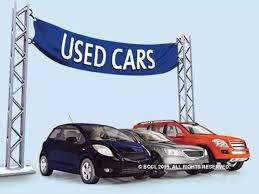

## Table of Contents

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

# 1. Introduction

The demand for second-hand cars has seen a surge as many people are buying or planning to buy their own car to avoid public transport.

There are multiple options to sell a car. You can connect with your local dealer or visit portals which help in buying and selling cars online. Experts advise going through organized dealers such as online portals as they offer safety and convenience. “Organized dealers, including online portals, carry out proper checks and verification of the documents of the buyer. This helps in reducing the chances of the car being sold to a person who uses it for wrongful purposes.

Most of these portals have online calculators to arrive at the expected price you may get for your car, on the basis of certain factors.
Apart from age (how old the car is), there are multiple other factors that affect the value of the car. “Broadly, a used car’s price is based on the make, model, variant, kilometres run, condition, registration year, ownership frequency or status, as well as the state of registration of the vehicle". 

Models that are more in demand are likely to attract better prices.
The higher the number of ownership changes, lower will be the price.
The car that has been driven more is likely to attract a lower price compared to a car that has covered fewer kilometres. 
Cars with no accident history may also attract a better price as they may be in better condition.
If you don’t renew the insurance of the car at the time of sale, the vehicle is likely to get a lower price.
All documentation related to the vehicle such as registration certificate (RC), valid insurance and pollution under control (PUC) certificate, service record, history report, financial contract and owner manual should be maintained to increase the valuation of the car.


# 2. Problem Statement

- **Cars Absolute**, an American company buys and sells second hand cars.The company has earned its name because of sincerity in work and quality of services.But for past few months their sales is down.

**Our main objective for data analysis is to get the solution for below mentioned Business question**
- Why sale is getting reduced?
- How can it be improved?

# 3. Installing & Importing Libraries

In [1]:
!pip install -q datascience                          
!pip install -q pandas-profiling            

In [2]:
!pip install -q --upgrade pandas-profiling       
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

# 4. Data acquistion and Description

Features of dataset are as mentioned below:

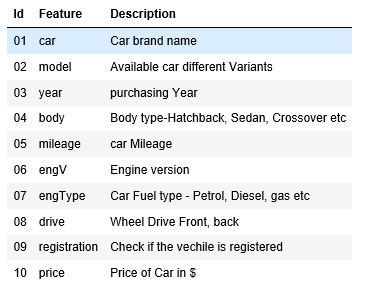

In [4]:
data_cs = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data_cs.shape)
data_cs.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


## **Data Description**

In [5]:
data_cs.describe(include = "all")

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


**Observations:** We can see all numeric columns having count 9576 except engV. Looks like this column has some missing values price and mileage has min value as Zero which is not possible. We need to look into to replace them.

## **Data Information**

In [6]:
data_cs.info()     # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [7]:
data_cs.isnull().sum() # Will show you null count for each column, but will not count Zeros(0) as null

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

**Observations:** We can see that engV and drive columns contains maximum null values.So we have to figure out how to deal with this.

# 5. Data Pre-Profiling

In [8]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\23077755\anaconda3\lib\site-packages (2.10.0)


In [9]:
import pandas_profiling 

In [10]:
profile = data_cs.profile_report(title="Used Cars before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="Used Cars_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 10
- Number of observations: 9576
- Missing cells: 945 (1.0%)

**Variables types:** 
- Numeric = 4
- Categorical = 5
- Boolean = 1


# 6. Data Pre-Processing

**Handling redundant data.**
- There are 125 duplicate rows, so we will drop them.

In [11]:
data_cs.drop_duplicates(inplace=True)  #inplace used to modify the dataset with applied command
data_cs.shape

(9463, 10)

In [12]:
data_cs.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)

**Handling missing values**

**price:** Replacing missing values now for price column based on car & model group product and median value of price based on this group.

In [13]:
def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif data_cs.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = data_cs.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'price' feature. 
        return data_cs['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
price_median = data_cs.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_medn'}, inplace=True)
price_median.head()

,car,model,price_medn
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [14]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_medn'].values[0]
    else:
        return x['price']
    
data_cs['price'] = data_cs.apply(fill_with_median, axis=1)
data_cs.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,NaN,yes,2013,E-Class,NaN


**engV:** Replacing missing values now for engV column based on car & model group product and median value of engV based on this group.

In [15]:
def get_median_engV(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif data_cs.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = data_cs.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'engV' feature. 
        return data_cs['engV'].median() # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = data_cs.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_medn'}, inplace=True)
engV_median.head()

,car,model,engV_medn
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [16]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car'] == x['car']) & (engV_median['model'] == x['model'])]['engV_medn'].values[0]
    else:
        return x['engV']
    
data_cs['engV'] = data_cs.apply(fill_with_median, axis=1)
data_cs.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,NaN


**Mileage:** Replacing missing values now for mileage column based on car,model & year group product and median value of mileage based on this group. Year has been included here as per data observations year to year mileage is getting down for the same Car/Brand combination

In [17]:
def get_median_mileage(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif data_cs.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = data_cs.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'mileage' feature. 
        return data_cs['mileage'].median() # Otherwise return dataset's median for the 'mileage' feature.
    
mileage_median = data_cs.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_medn'}, inplace=True)
mileage_median.head()

,car,model,mileage_medn
0,Acura,MDX,85.0
1,Acura,RL,138.0
2,Acura,TL,145.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [18]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_medn'].values[0]
    else:
        return x['mileage']
    
data_cs['mileage'] = data_cs.apply(fill_with_median, axis=1)
data_cs.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,NaN


- **Handling categorical data drive:** Replacing missing values now for drive column based on car and model group product and mode value of drive based on this group

In [19]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()        # Return mode for a brand/model if the mode exists.
    elif data_cs.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = data_cs.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode      # Return mode of brand if particular brand/model combo has no mode,
    else:                      # but brand itself has a mode for the 'drive' feature. 
        return data_cs['drive'].mode() # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes = data_cs.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [20]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
data_cs['drive'] = data_cs.apply(fill_with_mode, axis=1)
data_cs.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,rear


In [21]:
def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif data_cs.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = data_cs.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'engType' feature. 
        return data_cs['engType'].mode() # Otherwise return dataset's mode for the 'engType' feature.
    
engType_modes = data_cs.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

,car,model,engType_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas
2,Acura,TL,Gas
3,Acura,TLX,Petrol
4,Acura,ZDX,Petrol


In [22]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
data_cs['engType'] = data_cs.apply(fill_with_mode, axis=1)
data_cs.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,Diesel,yes,2013,E-Class,rear


In [23]:
data_cs.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

# **7. Data Post-Profiling**

In [24]:
profile = data_cs.profile_report(title="Used Cars Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="Used Cars_profiling_after_preprocessing.html")

**Observations from Pandas Profiling after Data Processing**

Dataset info:
- Number of variables: 9
- Number of observations: 9463
- Missing cells: 0

# **8. Exploratory Data Analysis**

Text(0.5, 1.0, 'Top 10 car brands on sale')

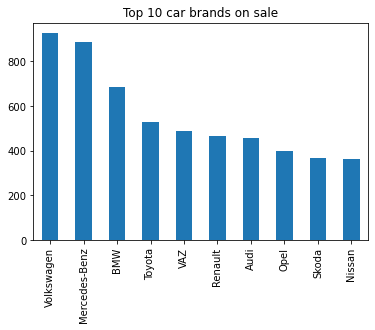

In [25]:
data_cs.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")

This shows Volkswagen and Mercedes-Benz are top most brands on sale and hence these would be preferred choices.

Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

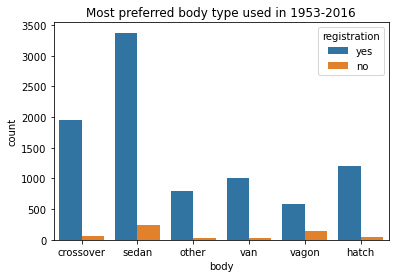

In [26]:
sns.countplot(x='body', data=data_cs, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")

Text(0.5, 1.0, 'Most preferred body type')

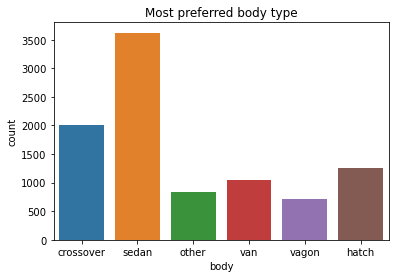

In [27]:
sns.countplot(x='body', data=data_cs, orient='h')
plt.title("Most preferred body type")

This shows the car brands having "sedan" type of body having maximum registration/sale over the years. 

Text(0.5, 1.0, 'Most preferred engType used over the years')

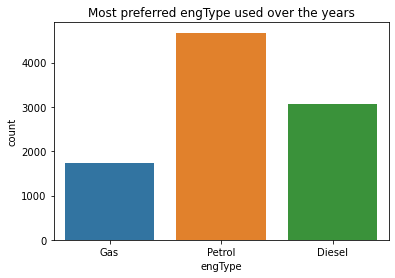

In [28]:
sns.countplot(x='engType', data=data_cs, orient='h')
plt.title("Most preferred engType used over the years")

- Petrol Engine is most prefererd.

Text(0.5, 1.0, 'Car sold as per drive')

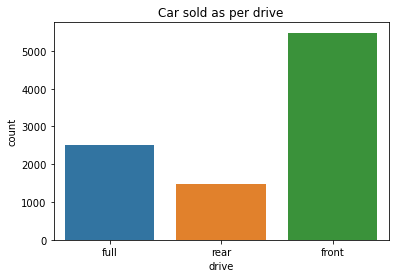

In [29]:
sns.countplot(x='drive', data=data_cs, orient='h')
plt.title("Car sold as per drive")

- Front drive is most preferrred type.

Text(0.5, 1.0, 'year - price lineplot (1950 - 2010)')

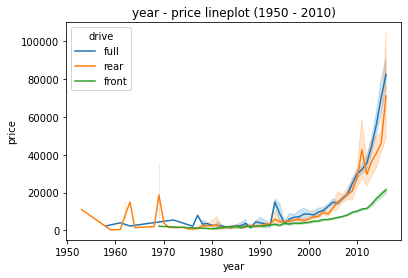

In [30]:
sns.lineplot(data=data_cs, y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2010)")

Text(0.5, 1.0, 'History of car sales in a year')

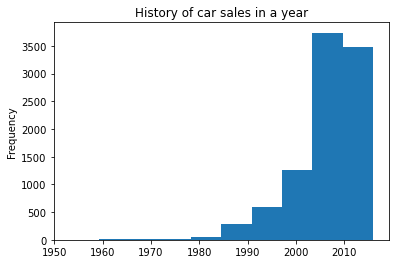

In [31]:
data_cs['year'].plot.hist(bins = 10) 
plt.title("History of car sales in a year")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

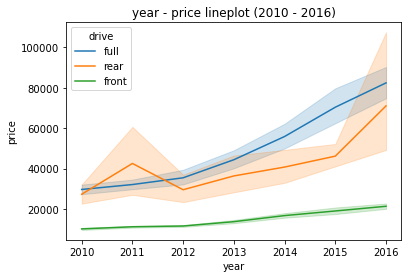

In [32]:
sns.lineplot(data=data_cs[data_cs.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

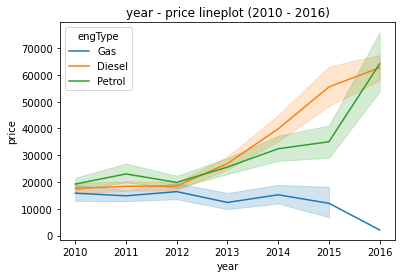

In [33]:
sns.lineplot(data=data_cs[data_cs.year >= 2010], y='price', x='year', hue='engType')
plt.title("year - price lineplot (2010 - 2016)")

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

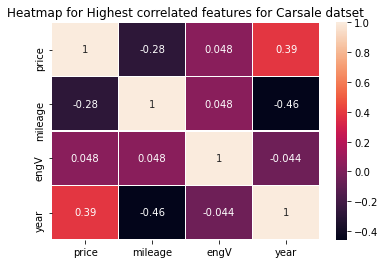

In [34]:
sns.heatmap(data_cs.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

Text(0.5, 1.0, 'Price distribution over the year')

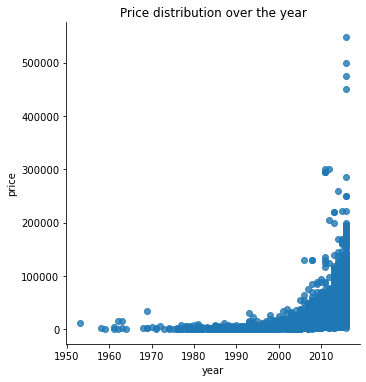

In [35]:
sns.lmplot('year','price', data_cs, fit_reg=False)
plt.title("Price distribution over the year")

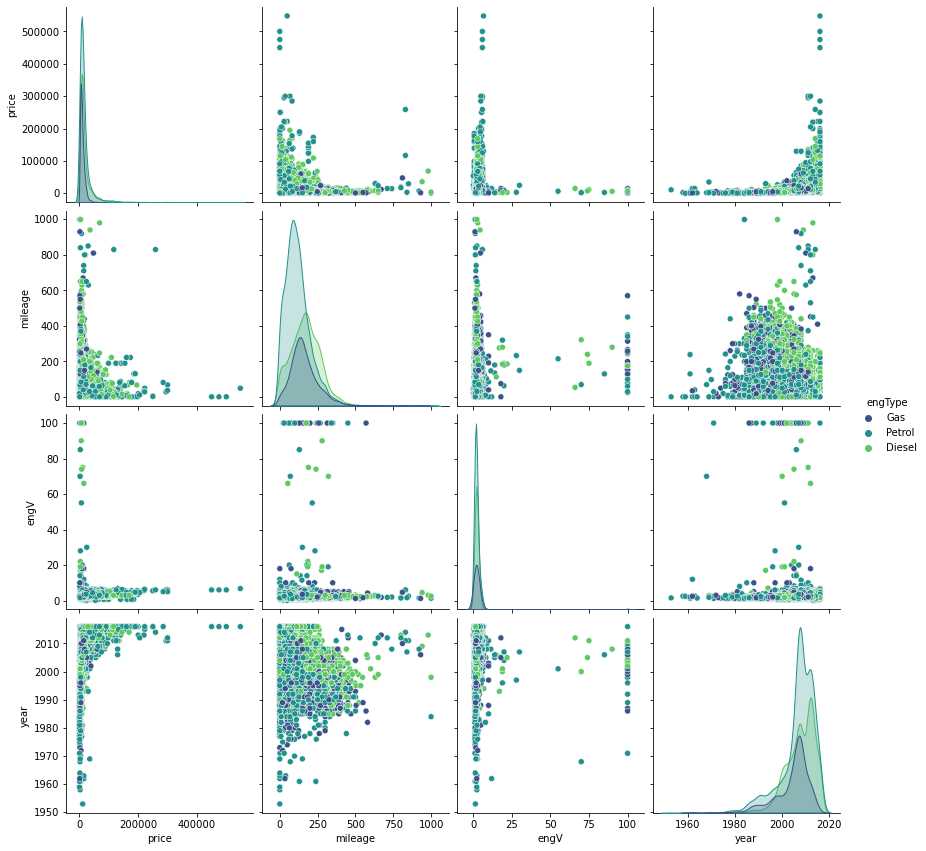

In [36]:
sns.pairplot(data_cs, hue='engType', palette="viridis", height=3)

<AxesSubplot:xlabel='drive', ylabel='mileage'>

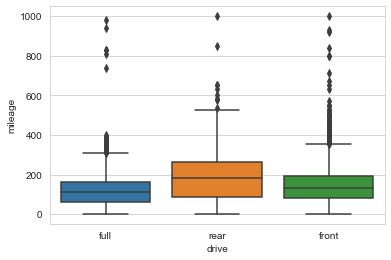

In [37]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'drive', y = 'mileage', data = data_cs) 

# **9. Summarization**

### **9.1 Conclusion**
* With the help of notebook we can learn how exploratory data analysis can be carried out using Pandas plotting.

* Also we have seen making use of packages like matplotlib and seaborn to develop better insights about the data.

* We have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. 

* We also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.

* We have seen the impact of columns like mileage, year and engType on the Price increase/decrease rate.


**1. Which brand of cars is most selling brand ?**


* From above analysis we can conclude that ,Volkswagen and Mercedes-Benz are top most brands on sale and hence these would be preferred choices.

**2. which type of cars are more selling?**

* "sedan" type of body having maximum registration/sale over the years. This shows People prefers sedan type of body mostly and hence this information can be use for achieving max sale and to figure out production of units.


**3. What are the factors affecting the price of cars?**

*  Price changing accordingly based on mileage value, So price is varying based on mileage too and this should be consider as a factor for the calculation

* Petrol engine type is preferred over diesel & gas.

### **9.2 Actionable Insights**

- To increase the sale of cars, price range should be less than 15K.
- Procure sedan cars having petrol engine and front drive as these are having more demand.
- Less preferred cars or too old cars should be Liquidated by giving some discounts so that stock can be cleared.
- Provision to make non registered vehicles registered will boost sale.
- Less acceptance to gas engine, so those cars can be converted to diesel/petrol engine.
